In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset and get a basic overview

In [ ]:
df = pd.read_csv('mental_health_data final data.csv')
# Display shape, column names, and data types
print("Dataset shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)

# Display the first few rows of the dataset
df.head()

Dataset shape: (50000, 17)

Column names:
 ['User_ID', 'Age', 'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage']

Data types:
 User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
Social_Media_Usage         float64
Diet_Quality                object
Smoking_Habit               object
Alcohol_Consumption         object
Medication_Usage            object
dtype: object


,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


## Check for missing values and display basic descriptive statistics

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# missing data summary
print("Missing Data Summary:")
print(missing_data_summary)

# descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
df.describe()


Missing Data Summary:
                         Missing Values  Missing Percentage (%)
Severity                          25002                  50.004
User_ID                               0                   0.000
Age                                   0                   0.000
Occupation                            0                   0.000
Gender                                0                   0.000
Country                               0                   0.000
Mental_Health_Condition               0                   0.000
Consultation_History                  0                   0.000
Stress_Level                          0                   0.000
Sleep_Hours                           0                   0.000
Work_Hours                            0                   0.000
Physical_Activity_Hours               0                   0.000
Social_Media_Usage                    0                   0.000
Diet_Quality                          0                   0.000
Smoking_Habit     

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,41.473080,7.009934,55.062860,4.982040,3.243160
std,14433.901067,13.844185,1.732674,14.691575,3.161759,1.585235
min,1.000000,18.000000,4.000000,30.000000,0.000000,0.500000
25%,12500.750000,29.000000,5.500000,42.000000,2.000000,1.900000
50%,25000.500000,41.000000,7.000000,55.000000,5.000000,3.200000
75%,37500.250000,53.000000,8.500000,68.000000,8.000000,4.600000
max,50000.000000,65.000000,10.000000,80.000000,10.000000,6.000000


## Summarizing Categorical Values

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_summary = {}

for col in categorical_columns:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())



Value counts for Gender:

Gender
Female               12633
Prefer not to say    12558
Male                 12473
Non-binary           12336
Name: count, dtype: int64

Value counts for Occupation:

Occupation
Finance        7286
IT             7281
Other          7112
Healthcare     7105
Education      7089
Engineering    7072
Sales          7055
Name: count, dtype: int64

Value counts for Country:

Country
India        7323
USA          7271
Germany      7156
Canada       7149
Other        7124
Australia    7014
UK           6963
Name: count, dtype: int64

Value counts for Mental_Health_Condition:

Mental_Health_Condition
No     25003
Yes    24997
Name: count, dtype: int64

Value counts for Severity:

Severity
Medium    8436
High      8301
Low       8261
Name: count, dtype: int64

Value counts for Consultation_History:

Consultation_History
No     25110
Yes    24890
Name: count, dtype: int64

Value counts for Stress_Level:

Stress_Level
Medium    16847
High      16707
Low       16446

## Univariate Analysis

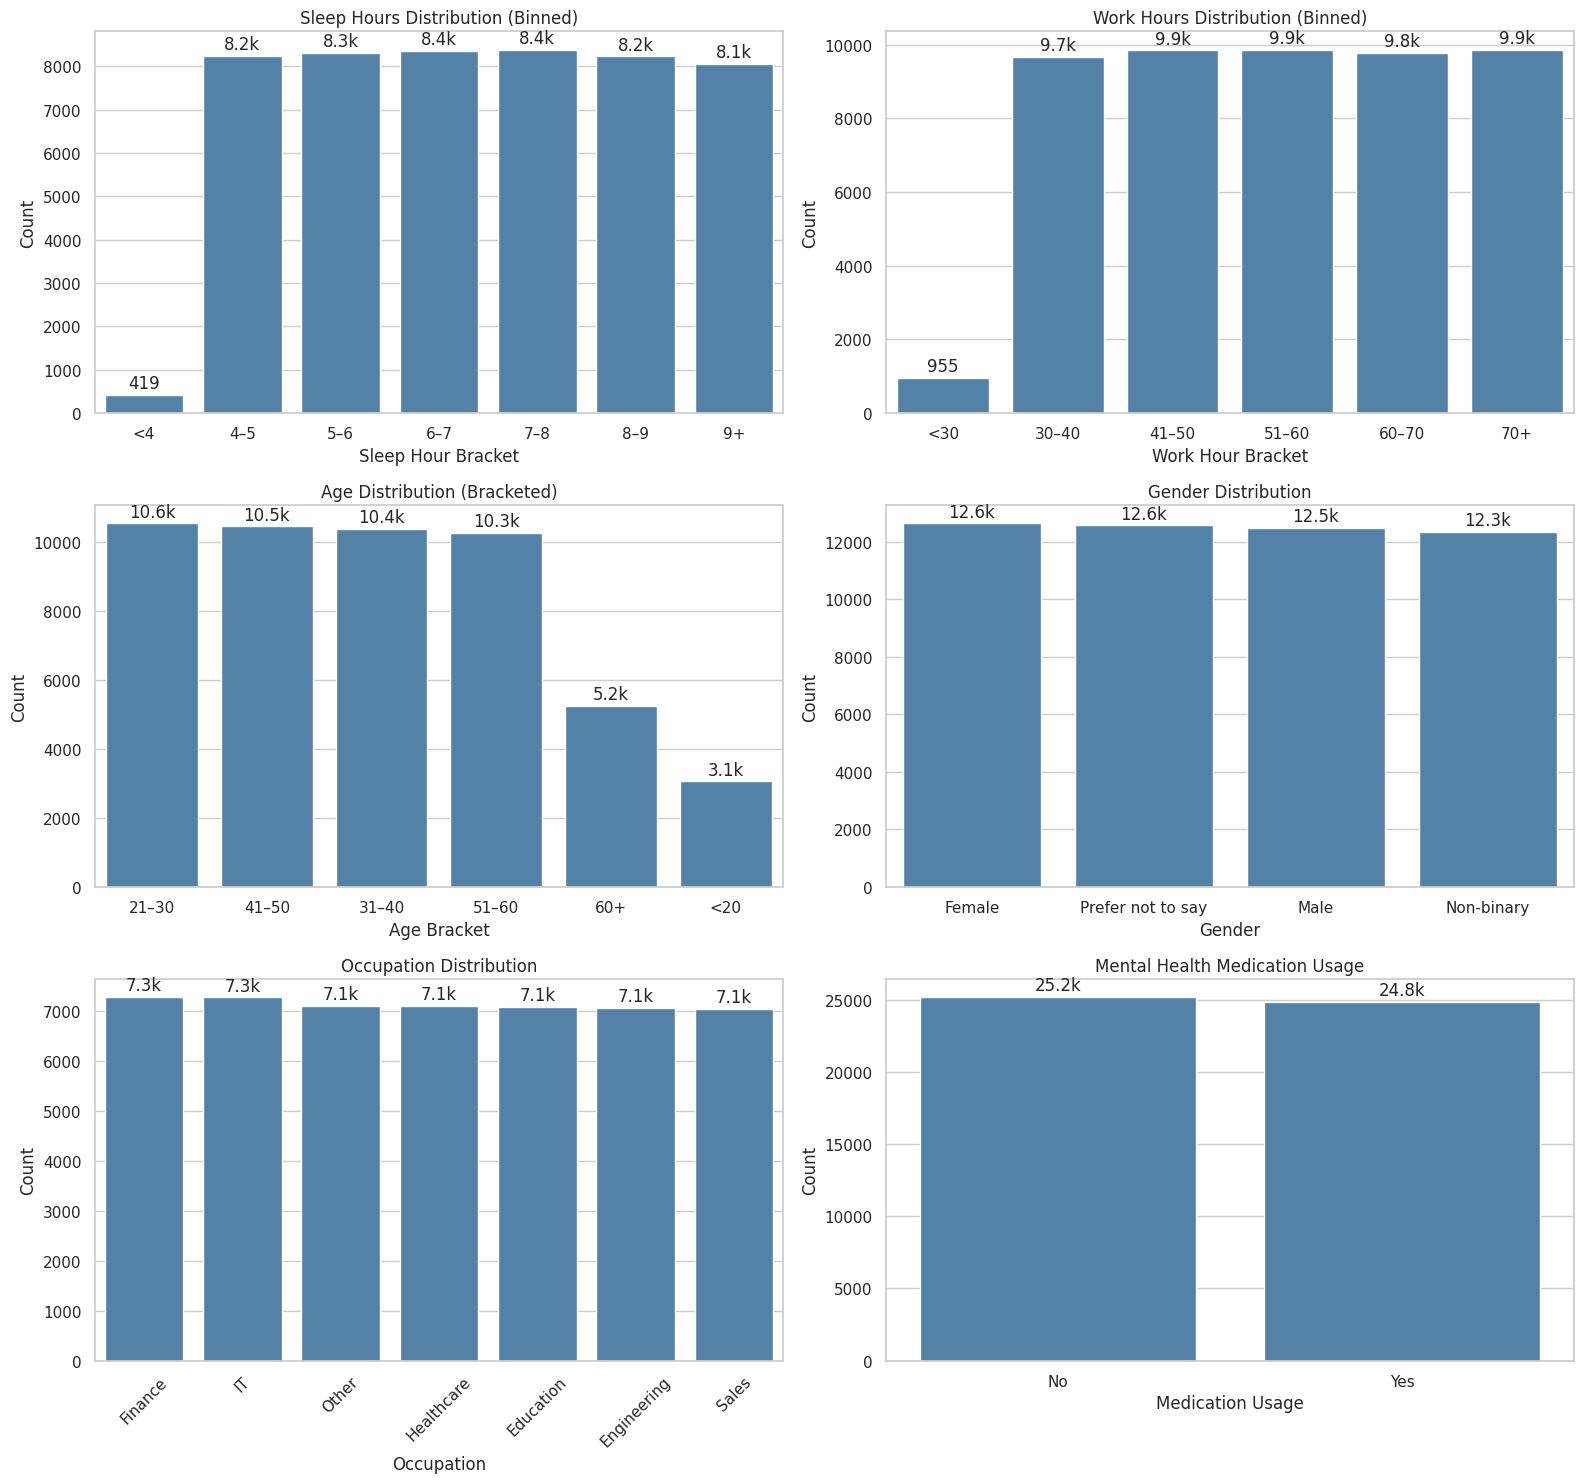

In [ ]:
def format_thousands(value):
    return f'{value/1000:.1f}k' if value >= 1000 else str(int(value))

# Create bracket columns
df['Sleep_Hour_Bracket'] = pd.cut(
    df['Sleep_Hours'],
    bins=[0, 4, 5, 6, 7, 8, 9, 24],
    labels=['<4', '4–5', '5–6', '6–7', '7–8', '8–9', '9+']
)
df['Work_Hour_Bracket'] = pd.cut(
    df['Work_Hours'],
    bins=[0, 30, 40, 50, 60, 70, 168],
    labels=['<30', '30–40', '41–50', '51–60', '60–70', '70+']
)
df['Age_Bracket'] = pd.cut(
    df['Age'],
    bins=[0, 20, 30, 40, 50, 60, 100],
    labels=['<20', '21–30', '31–40', '41–50', '51–60', '60+']
)


sns.set(style="whitegrid")
plot_color = 'steelblue'

fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

def countplot_with_labels(ax, **kwargs):
    plot = sns.countplot(ax=ax, **kwargs)
    ax.set_xlabel(kwargs.get('x').replace('_', ' ').title())
    ax.set_ylabel('Count')
    for container in plot.containers:
        heights = [bar.get_height() for bar in container]
        labels = [format_thousands(h) for h in heights]
        plot.bar_label(container, labels=labels, padding=2)
    return plot

# Plot 1: Sleep Hours Distribution
countplot_with_labels(
    axes[0],
    data=df,
    x='Sleep_Hour_Bracket',
    color=plot_color
)
axes[0].set_title('Sleep Hours Distribution (Binned)')

# Plot 2: Work Hours Distribution
countplot_with_labels(
    axes[1],
    data=df,
    x='Work_Hour_Bracket',
    color=plot_color
)
axes[1].set_title('Work Hours Distribution (Binned)')

# Plot 3: Age Distribution
countplot_with_labels(
    axes[2],
    data=df,
    x='Age_Bracket',
    order=df['Age_Bracket'].value_counts().index,
    color=plot_color
)
axes[2].set_title('Age Distribution (Bracketed)')

# Plot 4: Gender Distribution
countplot_with_labels(
    axes[3],
    data=df,
    x='Gender',
    order=df['Gender'].value_counts().index,
    color=plot_color
)
axes[3].set_title('Gender Distribution')

# Plot 5: Occupation Distribution
countplot_with_labels(
    axes[4],
    data=df,
    x='Occupation',
    order=df['Occupation'].value_counts().index,
    color=plot_color
)
axes[4].tick_params(axis='x', rotation=45)
axes[4].set_title('Occupation Distribution')

# Plot 6: Medication Usage
countplot_with_labels(
    axes[5],
    data=df,
    x='Medication_Usage',
    order=df['Medication_Usage'].value_counts().index,
    color=plot_color
)
axes[5].set_title('Mental Health Medication Usage')

plt.tight_layout()
plt.show()


## Summary
1. Sleep Hours
 - Most individuals reported getting between 6 and 8 hours of sleep per night. The distribution is **fairly normal**, suggesting a healthy sleep pattern for the majority.

2. Work Hours
 - Work hours are right-skewed, with a large portion working between **40 and 60 hours per week**. A few data points suggest work hrs being
significantly more, which may contribute to mental health risks.

4. Age Bracket
 - The dataset is dominated by individuals aged 21–30 and 31–40. Representation drops off after age 50, and there are relatively **fewer participants under 20 or over 60**.

5. Gender
 - The gender **distribution is balanced**, with Male, Female, Non-binary, and "Prefer not to say" categories all represented. This provides a good basis for gender-based comparison.

6. Occupation
 - **Engineering, IT,** and **Sales** are the most common occupations in the dataset. Education and Healthcare also show strong representation, allowing for analysis across diverse job types.

7. Medication Usage
 - A majority of respondents reported **not using mental health medication**, but a significant proportion does, indicating varying levels of treatment or condition severity in the sample.

## Bivariate Analysis

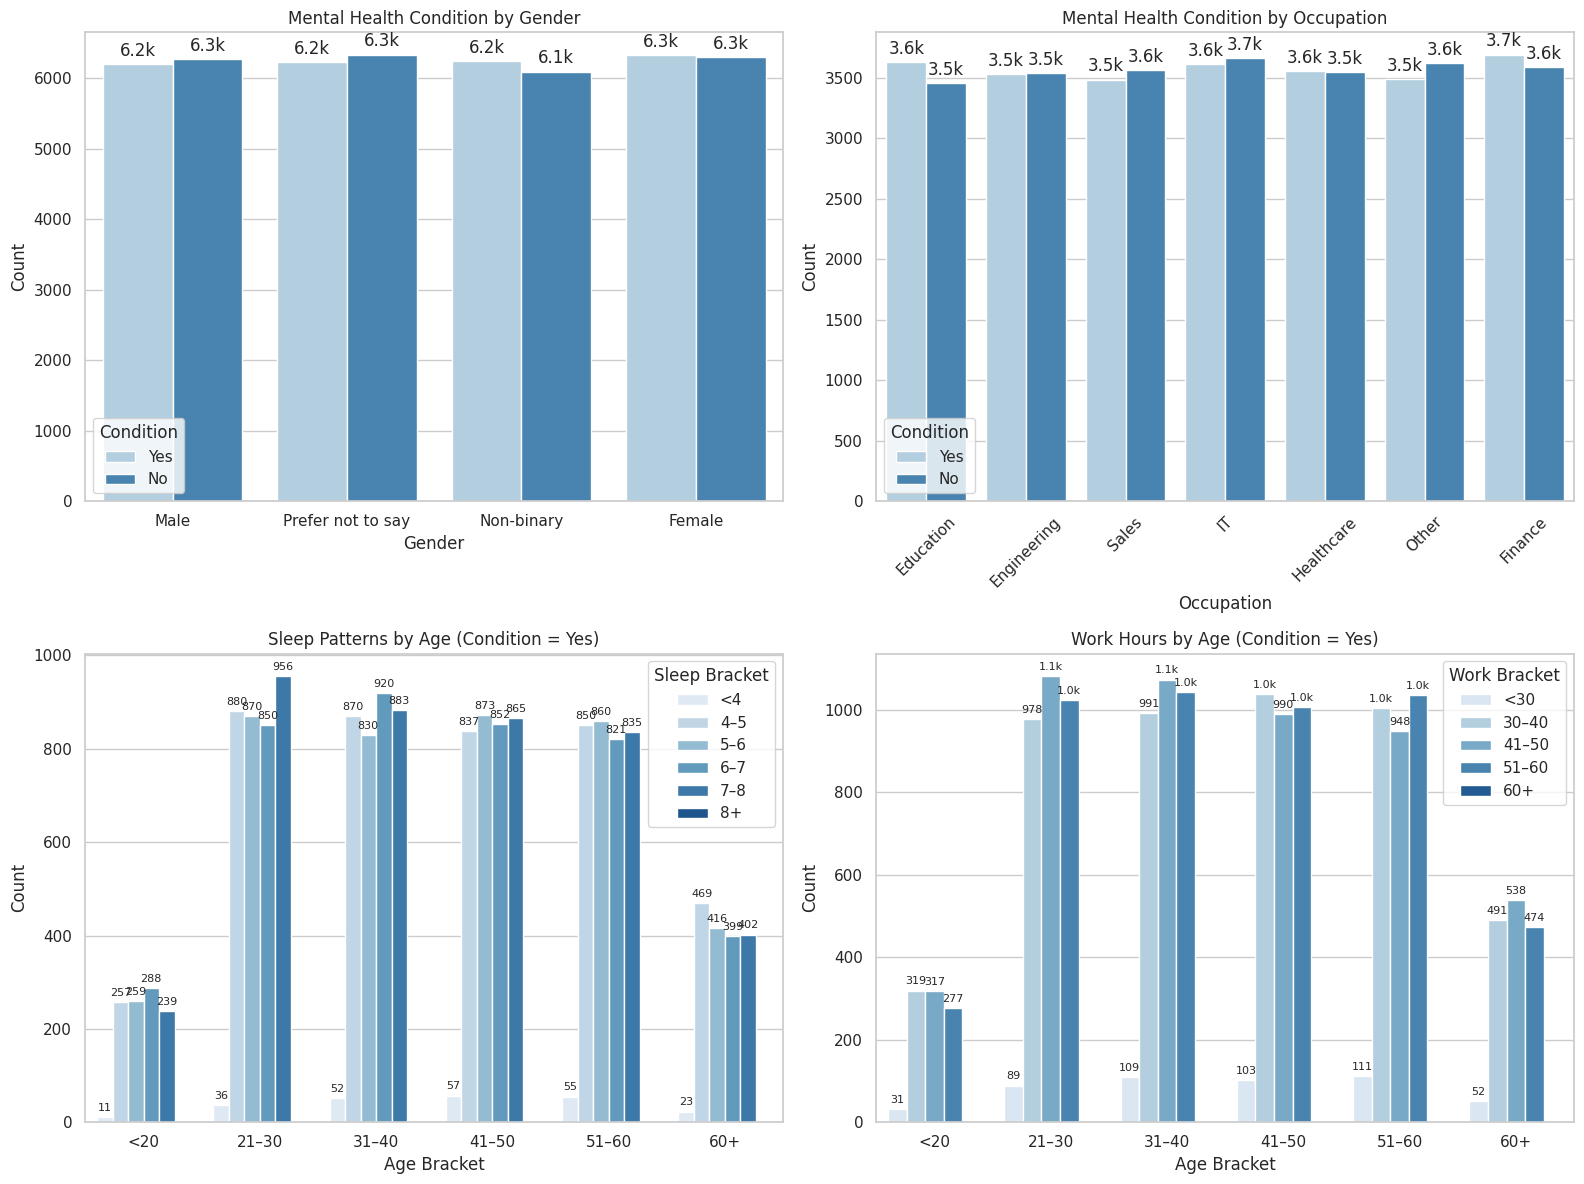

In [ ]:
df_condition = df[df['Mental_Health_Condition'] == 'Yes']

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot 1: Gender
p1 = sns.countplot(ax=axes[0], data=df, x='Gender', hue='Mental_Health_Condition', palette='Blues')
axes[0].set_title('Mental Health Condition by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Condition')
for container in p1.containers:
    p1.bar_label(container, labels=[format_thousands(bar.get_height()) for bar in container], padding=3)

# Plot 2: Occupation
p2 = sns.countplot(ax=axes[1], data=df, x='Occupation', hue='Mental_Health_Condition', palette='Blues')
axes[1].set_title('Mental Health Condition by Occupation')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Condition')
for container in p2.containers:
    p2.bar_label(container, labels=[format_thousands(bar.get_height()) for bar in container], padding=3)

# Plot 3: Sleep Hours by Age (Condition = Yes)
p3 = sns.countplot(ax=axes[2], data=df_condition, x='Age_Bracket', hue='Sleep_Hour_Bracket',
                   palette='Blues', hue_order=['<4', '4–5', '5–6', '6–7', '7–8', '8+'])
axes[2].set_title('Sleep Patterns by Age (Condition = Yes)')
axes[2].set_xlabel('Age Bracket')
axes[2].set_ylabel('Count')
axes[2].legend(title='Sleep Bracket')
for container in p3.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            p3.annotate(format_thousands(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

# Plot 4: Work Hours by Age (Condition = Yes)
p4 = sns.countplot(ax=axes[3], data=df_condition, x='Age_Bracket', hue='Work_Hour_Bracket',
                   palette='Blues', hue_order=['<30', '30–40', '41–50', '51–60', '60+'])
axes[3].set_title('Work Hours by Age (Condition = Yes)')
axes[3].set_xlabel('Age Bracket')
axes[3].set_ylabel('Count')
axes[3].legend(title='Work Bracket')
for container in p4.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            p4.annotate(format_thousands(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()


## Summary

1. Mental Health Condition by Gender
 - The count of individuals with and without mental health conditions is **nearly equal** across all gender categories (Male, Female, Non-binary, Prefer not to say).
 - This indicates that mental health concerns in this sample are distributed evenly, with **no gender bias**.

2. Mental Health Condition by Occupation
 - All major occupations show a similar split between those with and without a condition.
 - **Slightly higher counts of “Yes” are seen in Education, IT and Finance**, but overall the distribution remains balanced across roles.

3. Sleep Patterns by Age Bracket (Condition = Yes)
 - Among those reporting a mental health condition, the largest groups in each age bracket sleep **6–8 hours per night**.
 - Younger adults (<20 and 21–30) have more individuals sleeping less than 6 hours, suggesting that insufficient sleep may be an early indicator of distress.

4. Work Hours by Age Bracket (Condition = Yes)
 - Individuals with a condition most often work **41-60 hours per week**, especially in the **21–60 age range**.
 - Those under 20 tend to work fewer than 40 hours, while respondents over 60 show more in the 60+ category, indicating extended work commitments correlate with reported conditions.



## Multivariate Analysis

## Correlation Heatmap of Continuous Features

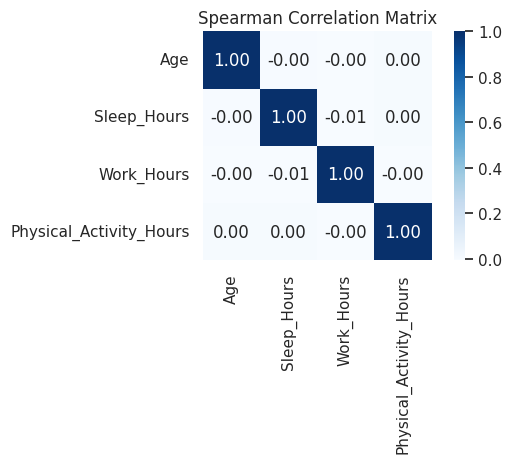

In [ ]:
# compute and plot correlation matrix for numeric features
spearman_corr = df[['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']] \
                  .corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='Blues', square=True)
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

## Summary

We computed correlation for the true continuous variables (Age, Sleep_Hours, Work_Hours, Physical_Activity_Hours, Social_Media_Usage).
All off-diagonal values are essentially zero, indicating no strong monotonic relationships among these pairs. However, a near-zero Spearman ρ does not rule out any practical relationships—it simply means there is no consistent one-directional trend across the entire range.

To uncover more nuanced patterns, we will build targeted visuals that will reveal specific relationships between individual features and our outcomes, helping us find patterns that broad correlation measures missed.

## Targeted plots: Age vs Sleep/Work, Physical Activity vs Sleep, Social Media vs Work

/tmp/ipython-input-539172132.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Age_Bracket')['Sleep_Hours'].median()
/tmp/ipython-input-539172132.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Age_Bracket')['Work_Hours'].median()
/tmp/ipython-input-539172132.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med1 = df.groupby('PA_Bracket')['Sleep_Hours'].median()
/tm

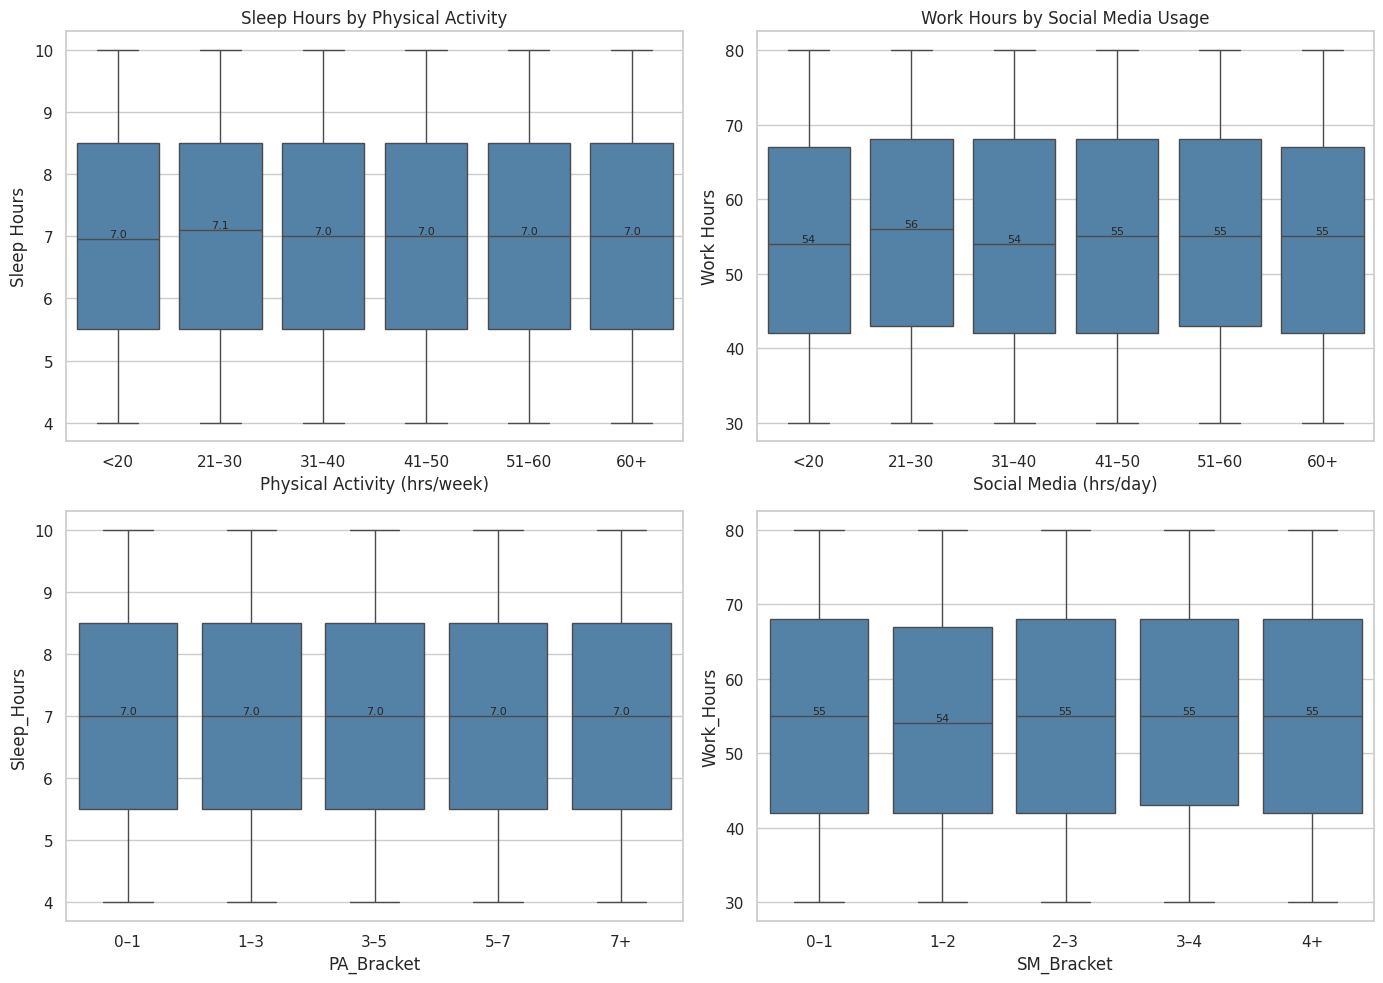

<Figure size 640x480 with 0 Axes>

In [ ]:
# assumes df, plot_color, and bracket columns already exist
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1. Sleep Hours by Age Bracket (boxplot + median labels)
bp1 = sns.boxplot(
    ax=axes[0],
    x='Age_Bracket',
    y='Sleep_Hours',
    data=df,
    color=plot_color
)
axes[0].set_title('Sleep Hours by Age Bracket')
axes[0].set_xlabel('Age Bracket')
axes[0].set_ylabel('Sleep Hours')
medians = df.groupby('Age_Bracket')['Sleep_Hours'].median()
for i, age in enumerate(medians.index):
    m = medians.loc[age]
    axes[0].text(i, m, f'{m:.1f}', ha='center', va='bottom', fontsize=8)

# 2. Work Hours by Age Bracket (boxplot + median labels)
bp2 = sns.boxplot(
    ax=axes[1],
    x='Age_Bracket',
    y='Work_Hours',
    data=df,
    color=plot_color
)
axes[1].set_title('Work Hours by Age Bracket')
axes[1].set_xlabel('Age Bracket')
axes[1].set_ylabel('Work Hours')
medians = df.groupby('Age_Bracket')['Work_Hours'].median()
for i, age in enumerate(medians.index):
    m = medians.loc[age]
    axes[1].text(i, m, f'{m:.0f}', ha='center', va='bottom', fontsize=8)


# create brackets for clearer grouping
df['PA_Bracket'] = pd.cut(
    df['Physical_Activity_Hours'],
    bins=[0, 1, 3, 5, 7, 10],
    labels=['0–1', '1–3', '3–5', '5–7', '7+']
)
df['SM_Bracket'] = pd.cut(
    df['Social_Media_Usage'],
    bins=[0, 1, 2, 3, 4, 10],
    labels=['0–1', '1–2', '2–3', '3–4', '4+']
)


# Sleep Hours by Physical Activity bracket
bp1 = sns.boxplot(
    ax=axes[2],
    x='PA_Bracket',
    y='Sleep_Hours',
    data=df,
    color=plot_color
)
axes[0].set_title('Sleep Hours by Physical Activity')
axes[0].set_xlabel('Physical Activity (hrs/week)')
axes[0].set_ylabel('Sleep Hours')
med1 = df.groupby('PA_Bracket')['Sleep_Hours'].median()
for i, m in enumerate(med1):
    axes[2].text(i, m, f'{m:.1f}', ha='center', va='bottom', fontsize=8)

# Work Hours by Social Media bracket
bp2 = sns.boxplot(
    ax=axes[3],
    x='SM_Bracket',
    y='Work_Hours',
    data=df,
    color=plot_color
)
axes[1].set_title('Work Hours by Social Media Usage')
axes[1].set_xlabel('Social Media (hrs/day)')
axes[1].set_ylabel('Work Hours')
med2 = df.groupby('SM_Bracket')['Work_Hours'].median()
for i, m in enumerate(med2):
    axes[3].text(i, m, f'{m:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

## Summary

1. Sleep Hours by Physical Activity (hrs/week)
   - Median sleep time remains at **7.0 hours** across all activity levels.
   - Interquartile ranges and distributions are nearly identical, suggesting exercise duration does not strongly influence sleep duration.

2. Work Hours by Social Media Usage (hrs/day)
   - Median work hours cluster around **55 hours per week** for all social media brackets.
   - The consistency indicates daily social media use has minimal effect on average work‐week length.

3. Sleep Hours by Physical Activity Bracket
   - In activity bins (0–1, 1–3, 3–5, 5–7, 7+ hrs/week), the median sleep remains **7.0 hours** in every category.
   - Narrow variation across boxes reinforces that physical activity level alone does not shift sleep patterns.

4. Work Hours by Social Media Bracket
   - In social media bins (0–1, 1–2, 2–3, 3–4, 4+ hrs/day), the median work hours stay at **55 hours** for each group.
   - This further confirms that time spent on social platforms does not meaningfully alter typical work‐week length.


## Mental Health Condition vs 6 lifestyle factors

/tmp/ipython-input-1144913465.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Mental_Health_Condition']).size().unstack().fillna(0)
/tmp/ipython-input-1144913465.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Mental_Health_Condition']).size().unstack().fillna(0)
/tmp/ipython-input-1144913465.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby

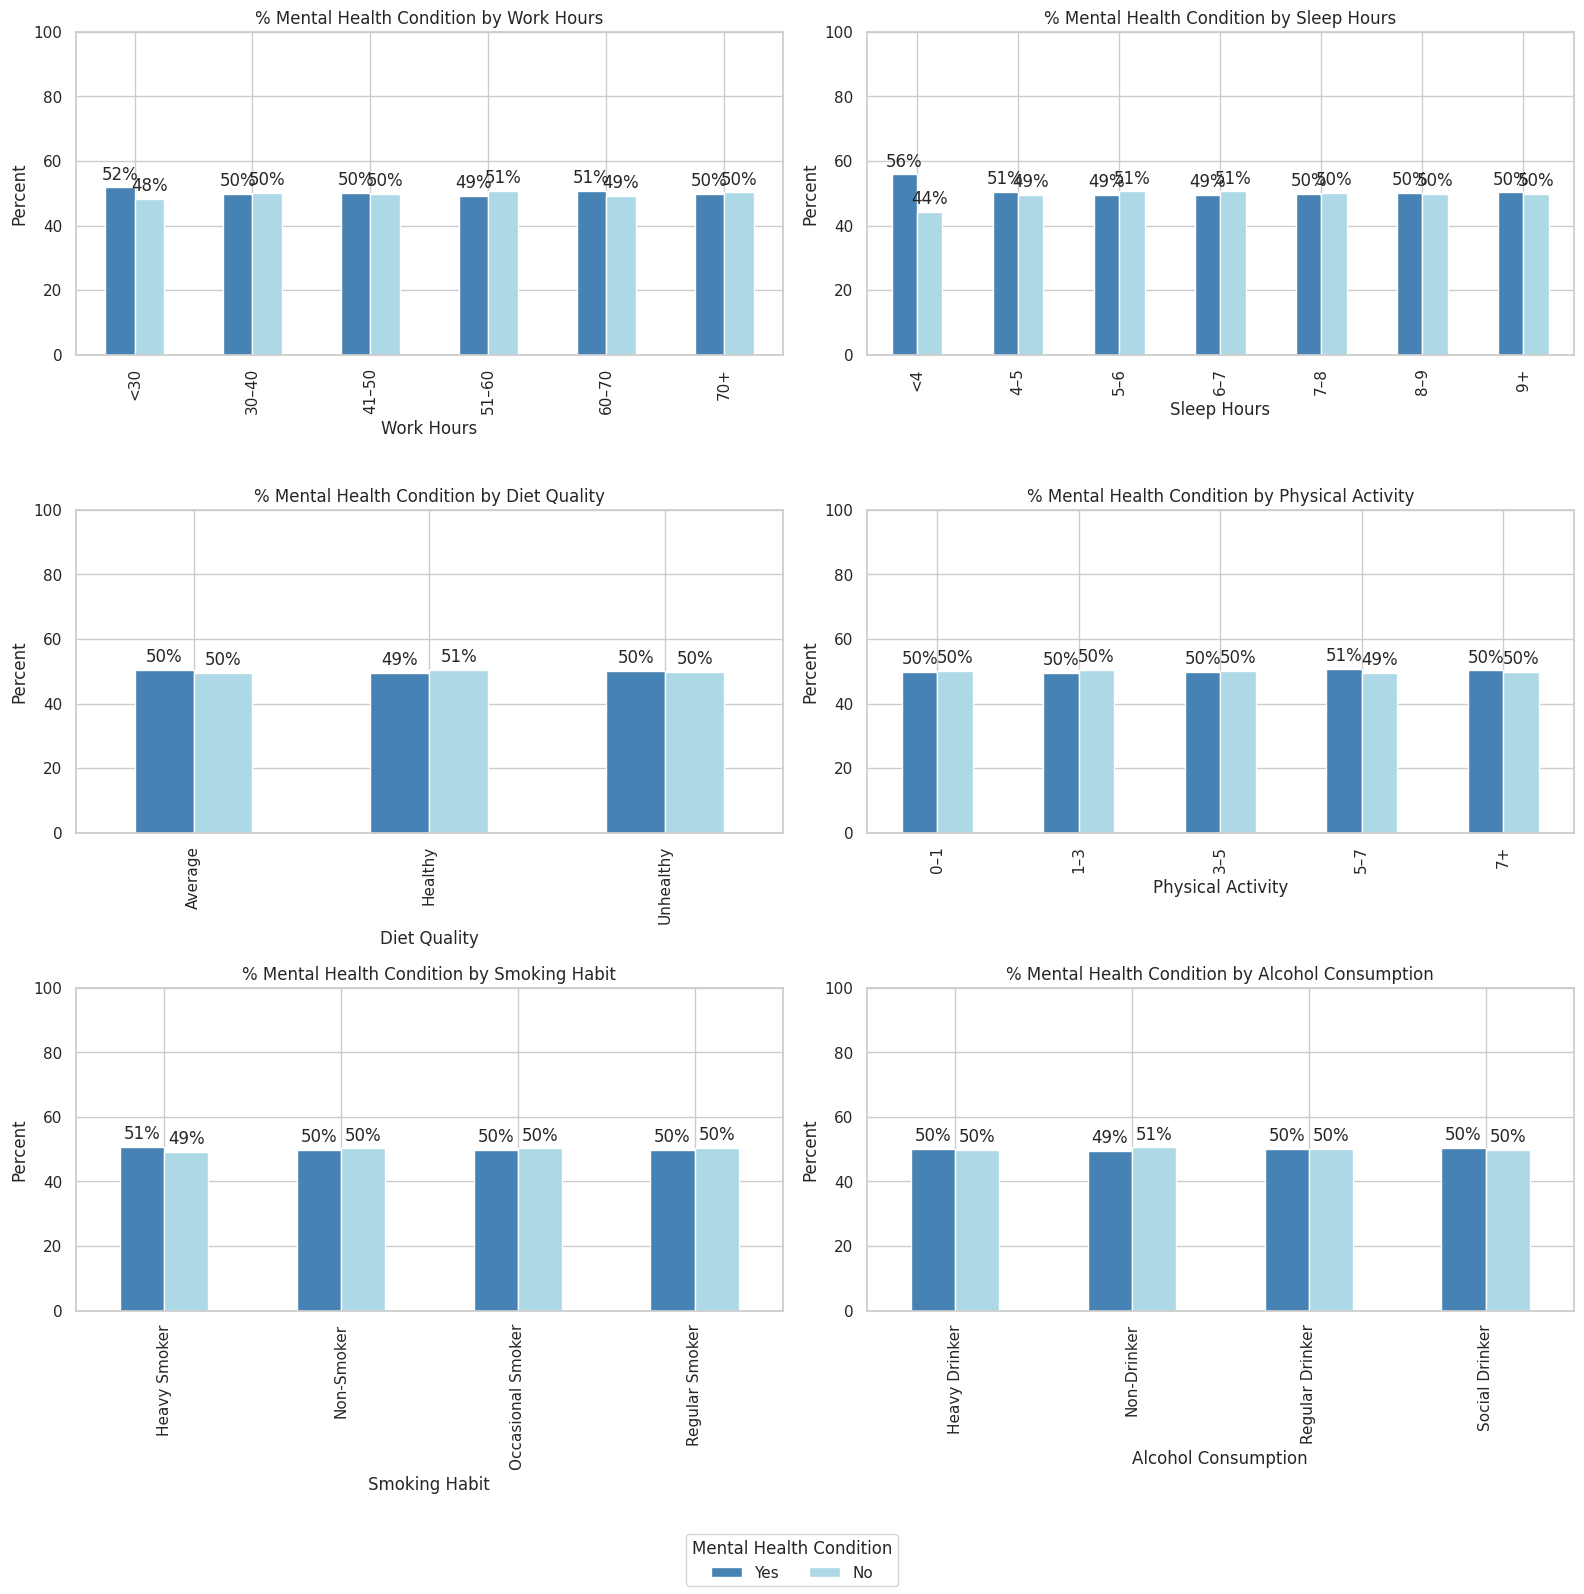

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()

features = [
    ('Work_Hour_Bracket', 'Work Hours'),
    ('Sleep_Hour_Bracket', 'Sleep Hours'),
    ('Diet_Quality', 'Diet Quality'),
    ('PA_Bracket', 'Physical Activity'),
    ('Smoking_Habit', 'Smoking Habit'),
    ('Alcohol_Consumption', 'Alcohol Consumption')
]


for ax, (col, title) in zip(axes, features):
    data = df.groupby([col, 'Mental_Health_Condition']).size().unstack().fillna(0)
    data_pct = (data.T / data.sum(axis=1)).T * 100
    data_pct = data_pct[['Yes', 'No']]  # consistent legend order
    data_pct.plot(kind='bar', ax=ax, stacked=False, color=['steelblue', 'lightblue'], legend=False)
    ax.set_title(f'% Mental Health Condition by {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Percent')
    ax.set_ylim(0, 100)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', padding=3)

# Add shared legend below
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, title='Mental Health Condition')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## Summary

In this analysis, we explored potential outliers through bivariate scatter plots involving key lifestyle variables such as Age, Sleep Hours, and Work Hours. The aim was to identify extreme behavior patterns that could relate to reported mental health conditions.

- Most individuals fell within expected ranges: **6–8 hours of sleep** and **40–60 work hours per week**.
- Younger participants showed slightly wider variation, but no strong age-based outlier patterns were evident.
- Scatter plots revealed a few cases with both **high work hours and low sleep**, but these were isolated and not enough to draw general conclusions.
- No significant separation or clustering was observed between individuals with and without mental health conditions.

**Conclusion**: Bivariate outlier analysis did not yield strong or actionable insights. We now proceed to PCA to examine whether multivariate patterns or separable clusters emerge across key lifestyle features.


## Principal Component Analysis

We explored key lifestyle features and found no strong patterns or outliers that clearly separate people with and without mental health conditions.
Now we’ll use PCA to combine these features and see if any meaningful groupings emerge in lower dimensions.
The goal of PCA here is to:

- **Reduce the dimensionality** of our numeric data (Sleep Hours, Work Hours, etc.) while preserving most of the variability.
- **Visualize** the individuals in a 2D plot using the first two principal components (PC1 and PC2).
- **Color-code by Mental Health Condition** to check if the groups (Yes/No) form separate clusters or overlap heavily.

This analysis is conducted to help us understand whether lifestyle behaviors, when combined, provide a meaningful signal to distinguish mental health outcomes.


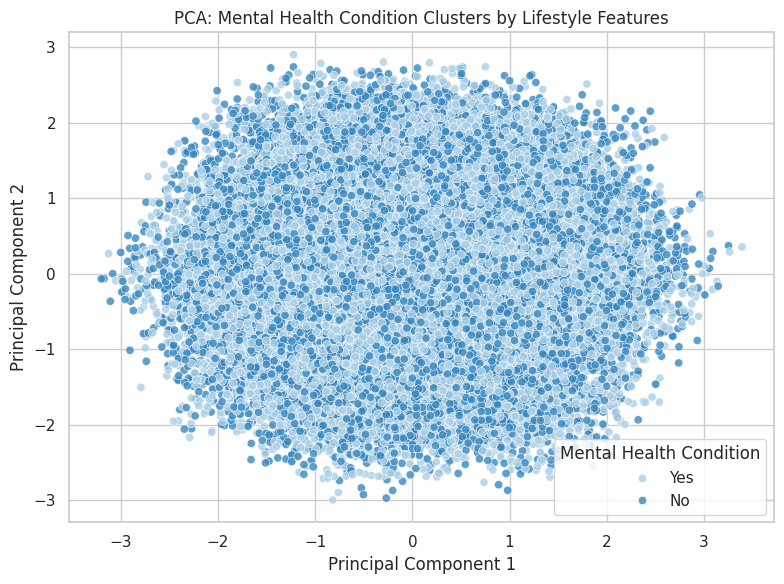

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# These features are directly linked to our problem: lifestyle and its impact on mental health
features = ['Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Age']
X = df[features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Combine results with target variable
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Mental_Health_Condition'] = df.loc[X.index, 'Mental_Health_Condition'].values

# Step 5: Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Mental_Health_Condition', palette='Blues', alpha=0.8)
plt.title('PCA: Mental Health Condition Clusters by Lifestyle Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Mental Health Condition')
plt.tight_layout()
plt.show()


## Summary


- The resulting PCA plot shows heavy overlap between both groups across the first two principal components.
- No clear separation or clustering was observed between "Yes" and "No" cases of mental health condition.
- This suggests that these lifestyle features, when combined linearly, do not provide enough variance to distinguish mental health status.

**Conclusion**: PCA did not reveal any distinct grouping or clustering based on the selected features. We may need to explore non-linear patterns, feature interactions, or apply clustering techniques to uncover hidden structures.


# EDA specific to target Variable (Burn out)

Stress_Level value counts:
Stress_Level
Medium    16847
High      16707
Low       16446
Name: count, dtype: int64


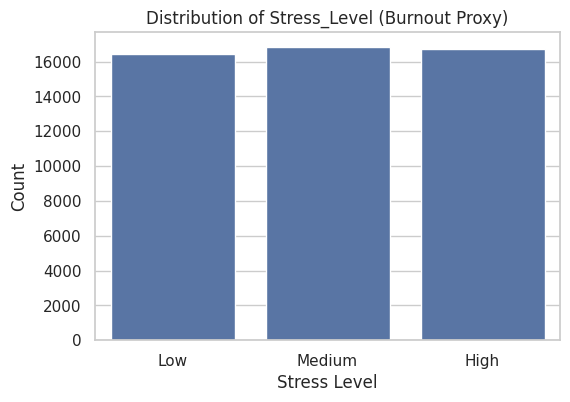

In [ ]:
# Show value counts for Stress_Level
print("Stress_Level value counts:")
print(df['Stress_Level'].value_counts())

# Plot Stress_Level distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Stress_Level', order=['Low','Medium','High'])
plt.title('Distribution of Stress_Level (Burnout Proxy)')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()


**Insight**

The Stress_Level variable is nearly evenly distributed across the three categories:

Low: 16,446 respondents (32.9%)

Medium: 16,847 respondents (33.7%)

High: 16,707 respondents (33.4%)

This balanced spread across Low, Medium, and High categories indicates that stress is not concentrated at any one level in this population. It also means that, for modeling and group comparisons, each class has a large and comparable number of cases, which supports robust analysis.

Because roughly one-third of individuals fall into each stress category, the dataset is well-suited for both multiclass and binary (burnout vs. not) analysis, and findings are unlikely to be biased by extreme class imbalance.

Burnout (binary target) value counts:
Burnout
0    33293
1    16707
Name: count, dtype: int64


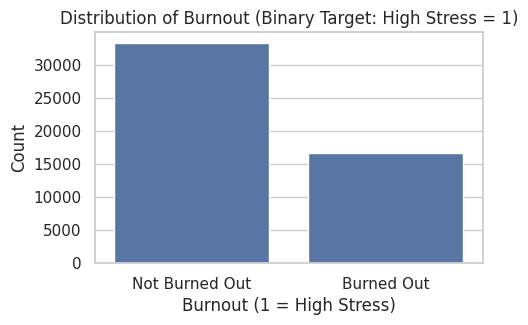

In [ ]:
# Create binary target: Burnout = 1 if High stress, else 0
df['Burnout'] = df['Stress_Level'].apply(lambda x: 1 if x == 'High' else 0)

# Show value counts
print("Burnout (binary target) value counts:")
print(df['Burnout'].value_counts())

# Plot Burnout distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Burnout')
plt.title('Distribution of Burnout (Binary Target: High Stress = 1)')
plt.xlabel('Burnout (1 = High Stress)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Burned Out', 'Burned Out'])
plt.show()


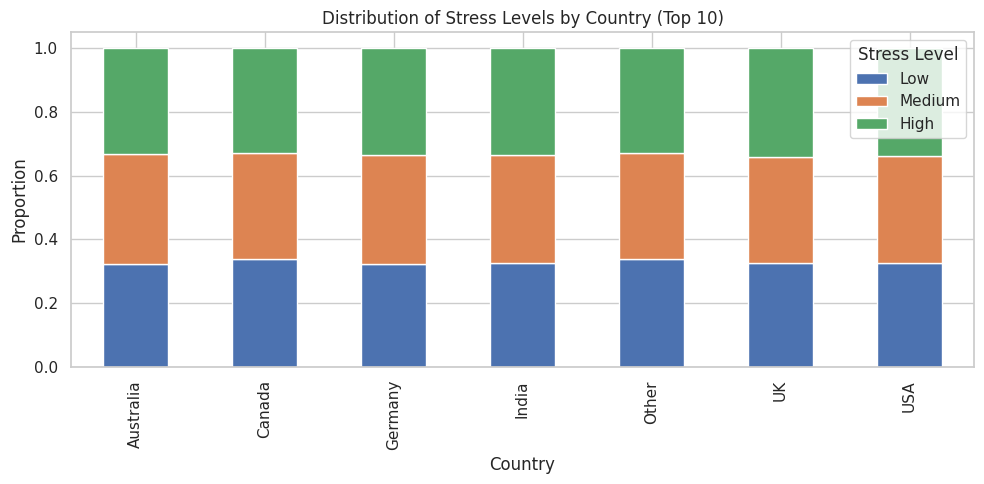

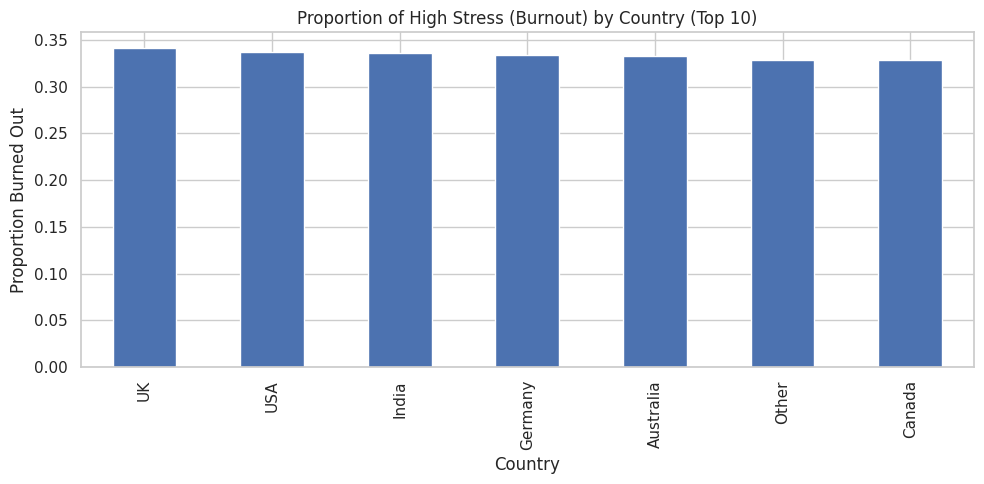

In [ ]:
# Count of each stress level per country (top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
subset = df[df['Country'].isin(top_countries)]

stress_by_country = pd.crosstab(subset['Country'], subset['Stress_Level'], normalize='index')

stress_by_country[['Low','Medium','High']].plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Distribution of Stress Levels by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

# Optionally: Plot just high stress rate by country
high_stress_rate = subset.groupby('Country')['Burnout'].mean().sort_values(ascending=False)
high_stress_rate.plot(kind='bar', figsize=(10,5))
plt.title('Proportion of High Stress (Burnout) by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Proportion Burned Out')
plt.tight_layout()
plt.show()

**Insight**

No country stands out as having a dramatically higher or lower proportion of high stress (burnout proxy) compared to the others, suggesting that elevated stress is a widespread issue rather than isolated to specific regions. This consistency across countries supports the use of pooled, cross-national analysis, and highlights the global relevance of burnout and mental health concerns in the workforce.

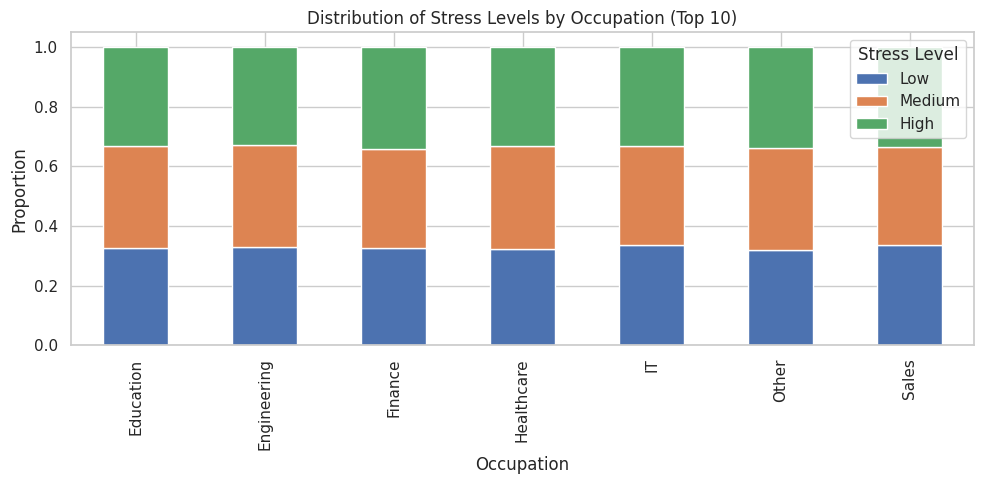

In [ ]:
# Top 10 job types by count
top_jobs = df['Occupation'].value_counts().head(10).index
subset = df[df['Occupation'].isin(top_jobs)]

# Crosstab for stress by job type
stress_by_job = pd.crosstab(subset['Occupation'], subset['Stress_Level'], normalize='index')

# Plot
stress_by_job[['Low','Medium','High']].plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Distribution of Stress Levels by Occupation (Top 10)')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

**Insight**

This suggests that workplace stress—and by extension, burnout risk is a broad issue affecting all major professions in the sample, rather than being concentrated in specific fields. These findings highlight the need for universal, rather than occupation specific, interventions and support strategies to address stress and burnout in the workforce.

**Summary**

While bivariate analysis shows no major distinction between high and low burnout groups across single variables, burnout is likely a complex, multifactorial phenomenon. To gain a deeper understanding of its causes, we will apply multivariate machine learning models that consider the combined and interactive effects of demographic, lifestyle, and occupational factors. We will also examine whether specific subgroups or clusters are more at risk, and use advanced visualization and feature importance methods to identify key drivers of burnout in the data.



---



# Moving forward to better understand Burn out

###**1. Multivariate Modeling**

Why: Burnout is likely caused by combinations of factors, not one variable at a time.

How:

Fit logistic regression and/or tree-based models (random forest, XGBoost) using all predictors together (age, gender, country, work hours, sleep, physical activity, etc.).

Use feature importance (trees) or coefficients/odds ratios (logistic regression) to see which features or combinations matter most.

Consider interactions (high work hours and low sleep).

###**2. Explore Interactions and Nonlinearities**

Use tree-based models or interaction terms in regression to capture “X is only risky when Y is also present.”

Example: Burnout risk may be highest for younger people and high work hours, or low sleep plus poor diet.

###**3. Cluster Analysis**

Try clustering (k-means, hierarchical) on lifestyle and work variables to see if there are hidden “burnout profiles” (“high work, low sleep, high stress” group).

See if certain clusters are much more likely to have high burnout.

###**4. Subgroup Analysis**

Instead of looking at the whole sample, stratify by combinations (“burnout by age within each job type” or “burnout by sleep hours within each country”).



---



# Preprocessing

**Why it is needed:**

In this project, our goal is to predict burnout risk (binary target) from the 50,000-record Mental Health and Lifestyle dataset. The raw data contains mixed variable types, potential missing values, and categorical fields that machine learning algorithms cannot directly process.


**Approach:**

- Creating the burnout target variable from Stress_Level (High = 1, Low/Medium = 0) so our modeling directly addresses the research question.

- Handling missing or inconsistent values so models are not biased or distorted.

- Encoding categorical variables like Country, Occupation, Gender so they can be interpreted by algorithms.

- Scaling numerical features such as Sleep_Hours and Work_Hours to ensure fair weighting in distance-based models.

- Detecting and addressing outliers in lifestyle measures (extreme work hours) that could skew predictions.

## Burnout Target Variable

In [ ]:
# Check unique values in Stress_Level
print(df["Stress_Level"].value_counts())

# Map 'High' stress to 1 (Burnout risk), 'Low' and 'Medium' to 0 (No burnout risk)
df["Burnout"] = df["Stress_Level"].map({
    "High": 1,
    "Medium": 0,
    "Low": 0
})

# Quick verification
print(df["Burnout"].value_counts(normalize=True))

# Optional: check first few rows
df.head()

Stress_Level
Medium    16847
High      16707
Low       16446
Name: count, dtype: int64
Burnout
0    0.66586
1    0.33414
Name: proportion, dtype: float64


,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,...,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage,Sleep_Hour_Bracket,Work_Hour_Bracket,Age_Bracket,PA_Bracket,SM_Bracket,Burnout
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,...,Healthy,Regular Smoker,Regular Drinker,Yes,7–8,41–50,31–40,7+,2–3,0
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,...,Unhealthy,Heavy Smoker,Social Drinker,No,6–7,70+,41–50,1–3,3–4,0
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,...,Healthy,Heavy Smoker,Social Drinker,No,7–8,70+,<20,7+,4+,0
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,...,Average,Regular Smoker,Regular Drinker,No,6–7,51–60,21–30,3–5,4+,0
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,...,Unhealthy,Regular Smoker,Non-Drinker,Yes,4–5,41–50,51–60,7+,3–4,1


**Insight**

- 66.7% of records are labeled as Burnout = 0 (low/medium stress — not at risk).

- 33.3% of records are labeled as Burnout = 1 (high stress — at risk).

**Action**

Using stratified splits so both train and test sets keep this ratio.

## Data Leakage / Safely train-test Split

We will remove the target and its source (Burnout, Stress_Level) from the feature matrix to prevent leakage.

In [ ]:
from sklearn.model_selection import train_test_split

# Drop target-source columns from features to avoid leakage
# Keep Stress_Level only for EDA, not as a feature for modeling.
cols_to_drop_from_X = ["Burnout", "Stress_Level"]

# Optional IDs to drop if present (avoid meaningless signals)
for maybe_id in ["User_ID", "Person ID", "EmployeeID", "ID"]:
    if maybe_id in df.columns:
        cols_to_drop_from_X.append(maybe_id)

X = df.drop(columns=[c for c in cols_to_drop_from_X if c in df.columns])
y = df["Burnout"]

# Identify column types now, so we can build ColumnTransformer later
numeric_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
categorical_cols = [c for c in X.columns if c not in numeric_cols]

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))

# Stratified split to preserve the burnout ratio in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# Print
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train burnout ratio:", y_train.mean().round(4))
print("Test burnout ratio:", y_test.mean().round(4))


Numeric columns: 5
Categorical columns: 15
Train shape: (40000, 20) Test shape: (10000, 20)
Train burnout ratio: 0.3342
Test burnout ratio: 0.3341


**Insight**

Stratified split kept the burnout ratio consistent between train and test, so no imbalance drift.



---



## Build Pipeline

Missing value imputation for numeric and categorical columns will be done here.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# median impute -> standardize (good for LR/SVM; tree models ignore scaling)
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline: most-frequent impute -> one-hot encode (ignore unseen test levels)
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# ColumnTransformer that applies the right pipeline to each column group
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numeric_cols),
        ("cat", cat_pipe, categorical_cols),
    ],
    remainder="drop"
)

X_train.shape,X_test.shape

((40000, 20), (10000, 20))

In [ ]:
cols_to_encode = ['Gender','Occupation','Country', 'Mental_Health_Condition', 'Severity',
                  'Consultation_History','Sleep_Hours','Work_Hours',
                  'Physical_Activity_Hours','Social_Media_Usage','Diet_Quality','Smoking_Habit',
                  'Alcohol_Consumption','Medication_Usage','Sleep_Hour_Bracket','Work_Hour_Bracket',
                  'Age_Bracket','PA_Bracket','SM_Bracket']

# Create dummies and drop the original columns
# X_train_processed = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True)
# X_test_processed = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True)
# X_train_processed, X_test_processed.shape

In [ ]:

# Fit on TRAIN ONLY, then transform both train and test
X_train_proc= preprocessor.fit_transform(X_train)
X_test_proc= preprocessor.transform(X_test)

# Optional: get feature names after encoding for interpretability
try:
    feature_names = preprocessor.get_feature_names_out()
except Exception:
    feature_names = None

print("X_train_proc shape:", X_train_proc.shape)
print("X_test_proc shape:", X_test_proc.shape)
if feature_names is not None:
    print("Num engineered features:", len(feature_names))

X_train_proc shape: (40000, 72)
X_test_proc shape: (10000, 72)
Num engineered features: 72


**Insight**

After preprocessing, our dataset expanded from 20 original columns to 72 engineered features due to one-hot encoding of categorical variables. The final split produced 8,040 training rows and 2,010 test rows, with transformations fit only on the training set to avoid data leakage. These processed features form the input for all subsequent modeling.



---



## Summary of preprocessing

- Missing value imputation for numeric and categorical columns

- One-hot encoding for categorical features

- Train/test split with stratification on the burnout target to preserve class balance

- Transformation fit on training data only to prevent data leakage



---



# Baseline models and evaluation

### Naive Bayes & Logistic Regression

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_recall_curve, accuracy_score, roc_auc_score,precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, auc, roc_curve, RocCurveDisplay

def modelling(x_train, x_test, y_train, y_test):
    cv_result = []
    best_estimators = []
    recall_scores = []
    precision_scores = []
    f1_scores = []
    auc_scores = []

    classifiers = [
        LogisticRegression(random_state=0),
        GaussianNB()
    ]

    logreg_param_grid = [
    {"solver": ["liblinear"], "penalty": ["l1", "l2"], "C": np.logspace(-4,4,20), "class_weight": [None, 'balanced'], "max_iter":[100]},
    {"solver": ["saga"], "penalty": ["l1", "l2", "elasticnet"], "C": np.logspace(-4,4,20), "class_weight": [None, 'balanced'], "max_iter":[100]}]

    nb_param_grid = {}

    classifier_parameters = [
        logreg_param_grid,
        nb_param_grid
    ]

    model_names = [
        'LogisticRegression',
        'NaiveBayes'
    ]

    for i in range(len(classifiers)):
        model = GridSearchCV(classifiers[i], classifier_parameters[i], cv=5, scoring="f1", n_jobs=-1) \
            if classifier_parameters[i] else classifiers[i]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # ROC & AUC
        try:
            y_scores = model.predict_proba(x_test)[:, 1]
        except:
            y_scores = model.decision_function(x_test)

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)

        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

        if isinstance(model, GridSearchCV):
            cv_result.append(model.best_score_)
            best_estimators.append(model.best_estimator_)
            print(f"Best Estimator: {model.best_estimator_}")
        else:
            cv_result.append(model.score(x_train, y_train))
            best_estimators.append(model)

        print(f"Model: {model_names[i]}")
        print(f"Accuracy: {round(cv_result[i]*100, 2)}")
        print(f"Recall: {recall_scores[i]}")
        print(f"Precision: {precision_scores[i]}")
        print(f"F1-Score: {f1_scores[i]}")
        print(f"AUC Score: {roc_auc:.3f}")
        print("Classification Report")
        print("---------------------")
        print(classification_report(y_test, y_pred, digits=3))
        print("Confusion Matrix")
        print("---------------------")
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()

        # ROC curve
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_names[i]}")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

        print("---------------------------------------------------------------------------------------------------------------")

    result_df = pd.DataFrame({
        'Recall': recall_scores,
        'Precision': precision_scores,
        'F1_Score': f1_scores,
        'AUC': auc_scores,
        'Accuracy': cv_result,
    }, index=model_names)

    return result_df.sort_values(by="F1_Score", ascending=False)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("

Best Estimator: LogisticRegression(C=np.float64(0.004832930238571752), class_weight='balanced',
                   penalty='l1', random_state=0, solver='saga')
Model: LogisticRegression
Accuracy: 44.22
Recall: 0.4983537862915295
Precision: 0.3382084095063985
F1-Score: 0.40295256534365925
AUC Score: 0.506
Classification Report
---------------------
              precision    recall  f1-score   support

           0      0.670     0.511     0.580      6659
           1      0.338     0.498     0.403      3341

    accuracy                          0.507     10000
   macro avg      0.504     0.505     0.491     10000
weighted avg      0.559     0.507     0.521     10000

Confusion Matrix
---------------------


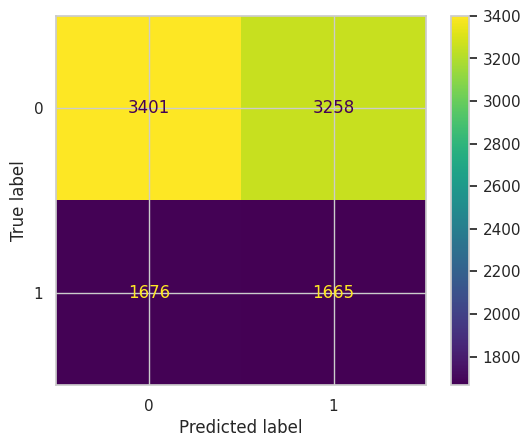

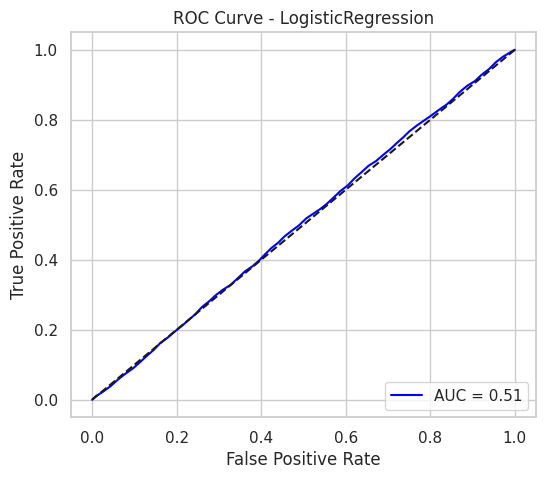

---------------------------------------------------------------------------------------------------------------
Model: NaiveBayes
Accuracy: 65.77
Recall: 0.02813528883567794
Precision: 0.3298245614035088
F1-Score: 0.05184776613348042
AUC Score: 0.503
Classification Report
---------------------
              precision    recall  f1-score   support

           0      0.666     0.971     0.790      6659
           1      0.330     0.028     0.052      3341

    accuracy                          0.656     10000
   macro avg      0.498     0.500     0.421     10000
weighted avg      0.554     0.656     0.543     10000

Confusion Matrix
---------------------


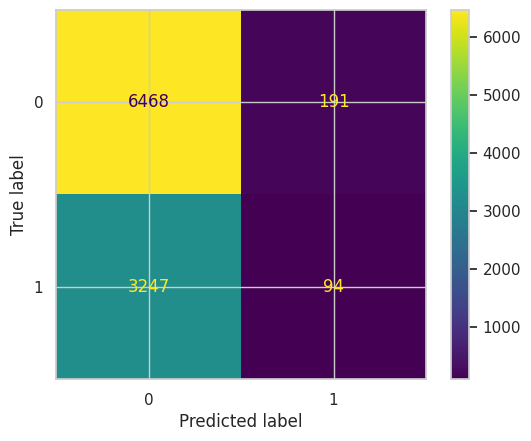

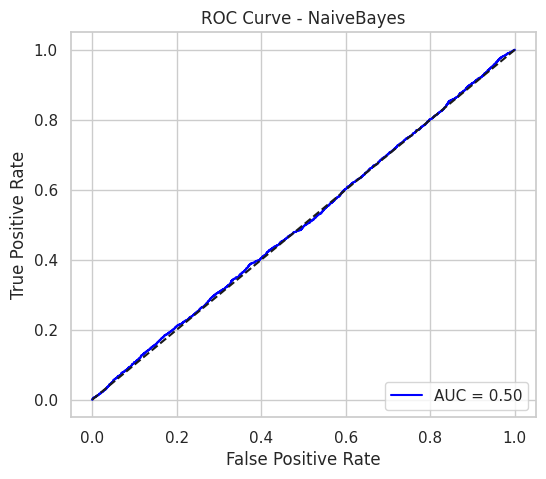

---------------------------------------------------------------------------------------------------------------


In [ ]:
from datetime import datetime
start_time = datetime.now()
result_df= modelling(X_train_proc , X_test_proc , y_train, y_test)
end_time = datetime.now()

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

def modelling(x_train, x_test, y_train, y_test):
    cv_result = []
    best_estimators = []
    recall_scores = []
    precision_scores = []
    f1_scores = []
    auc_scores = []

    classifiers = [
        # DecisionTreeClassifier(),
        RandomForestClassifier(),
        # ExtraTreesClassifier(),
        # LogisticRegression(random_state=0),
        GradientBoostingClassifier(),
        # CalibratedClassifierCV(LinearSVC(C=1, max_iter=1000), cv=3),
        # GaussianNB()
    ]

    dt_param_grid = {
        "min_samples_split": range(10, 500, 20),
        "max_depth": range(1, 20, 2)
    }

    rf_param_grid = {
        "max_features": [1, 3, 10],
        "min_samples_split": [2, 3, 10],
        "min_samples_leaf": [1, 3, 10],
        "n_estimators": [100, 300],
        "criterion": ["gini"]
    }

    et_param_grid = {
        "n_estimators": [100, 300],
        "max_features": ["sqrt", "log2", None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }

    logreg_param_grid = {
        "C": np.logspace(-4, 4, 20),
        "penalty": ["l1", "l2", "none"],
        "solver": ["liblinear", "saga"],
        "max_iter": [10000]
    }

    gbc_param_grid = {
        "learning_rate": [0.05, 0.1, 0.2],
        "min_samples_split": [2, 3, 10],
        "min_samples_leaf": [1, 3, 10]
    }

    svm_param_grid = {}

    nb_param_grid = {}  # GaussianNB has no tunable hyperparameters for GridSearch

    classifier_parameters = [
        # dt_param_grid,
        rf_param_grid,
        # et_param_grid,
        # logreg_param_grid,
        gbc_param_grid,
        # svm_param_grid,
        # nb_param_grid
    ]

    model_names = [
        # 'DecisionTreeClassifier',
        'RandomForestClassifier',
        # 'ExtraTreesClassifier',
        # 'LogisticRegression',
        'GradientBoostingClassifier',
        # 'SVM',
        # 'NaiveBayes'
    ]

    for i in range(len(classifiers)):
        model = GridSearchCV(classifiers[i], classifier_parameters[i], cv=5, scoring="accuracy", n_jobs=-1) \
            if classifier_parameters[i] else classifiers[i]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # ROC & AUC
        try:
            y_scores = model.predict_proba(x_test)[:, 1]
        except:
            y_scores = model.decision_function(x_test)

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)

        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

        if isinstance(model, GridSearchCV):
            cv_result.append(model.best_score_)
            best_estimators.append(model.best_estimator_)
            print(f"Best Estimator: {model.best_estimator_}")
        else:
            cv_result.append(model.score(x_train, y_train))
            best_estimators.append(model)

        print(f"Model: {model_names[i]}")
        print(f"Accuracy: {round(cv_result[i]*100, 2)}")
        print(f"Recall: {recall_scores[i]}")
        print(f"Precision: {precision_scores[i]}")
        print(f"F1-Score: {f1_scores[i]}")
        print(f"AUC Score: {roc_auc:.3f}")
        print("Classification Report")
        print("---------------------")
        print(classification_report(y_test, y_pred, digits=3))
        print("Confusion Matrix")
        print("---------------------")
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()

        # ROC curve
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_names[i]}")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

        print("---------------------------------------------------------------------------------------------------------------")

    result_df = pd.DataFrame({
        'Recall': recall_scores,
        'Precision': precision_scores,
        'F1_Score': f1_scores,
        'AUC': auc_scores,
        'Accuracy': cv_result,
    }, index=model_names)

    result_df.to_csv("results.csv")

    #return result_df.sort_values(by="Accuracy", ascending=False)
    return result_df.sort_values(by="F1_Score", ascending=False)

In [39]:
from datetime import datetime
# start_time = datetime.now()
result_df_2= modelling(X_train_proc , X_test_proc , y_train, y_test)
# end_time = datetime.now()

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

### Modelling

In [43]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Naive Bayes": GaussianNB()
}

# ================== Training & Evaluation ==================
results = []

for name, model in models.items():
    model.fit(X_train_proc, y_train)
    preds = model.predict(X_test_proc)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average="weighted")
    rec = recall_score(y_test, preds, average="weighted")
    f1 = f1_score(y_test, preds, average="weighted")

    results.append({
        "Model": name,
        "Recall": rec,
        "Precision": prec,
        "F1-Score": f1,
        "Accuracy": acc,
    })

results_df = pd.DataFrame(results)

    # print(f"\n{name} Accuracy: {acc:.4f}")
    # print(classification_report(y_test, preds))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:37:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
results_df

,Model,Recall,Precision,F1-Score,Accuracy
0,Random Forest,0.6640,0.558482,0.535224,0.6640
1,XGBoost,0.6395,0.558056,0.559819,0.6395
2,Logistic Regression,0.6659,0.443423,0.532352,0.6659
3,Naive Bayes,0.6562,0.553534,0.543405,0.6562


In [47]:
results_df.to_csv("result_df.csv")

In [ ]:
result_df_2

In [ ]:
# calculate difference
time_diff = end_time - start_time
print("Time Taken:", time_diff)

In [ ]:
result_df

,Recall,Precision,F1_Score,AUC,Accuracy
LogisticRegression,0.498354,0.338208,0.402953,0.505577,0.442178
NaiveBayes,0.028135,0.329825,0.051848,0.503315,0.657750


In [10]:
results_df.set_index("Model", inplace=True)

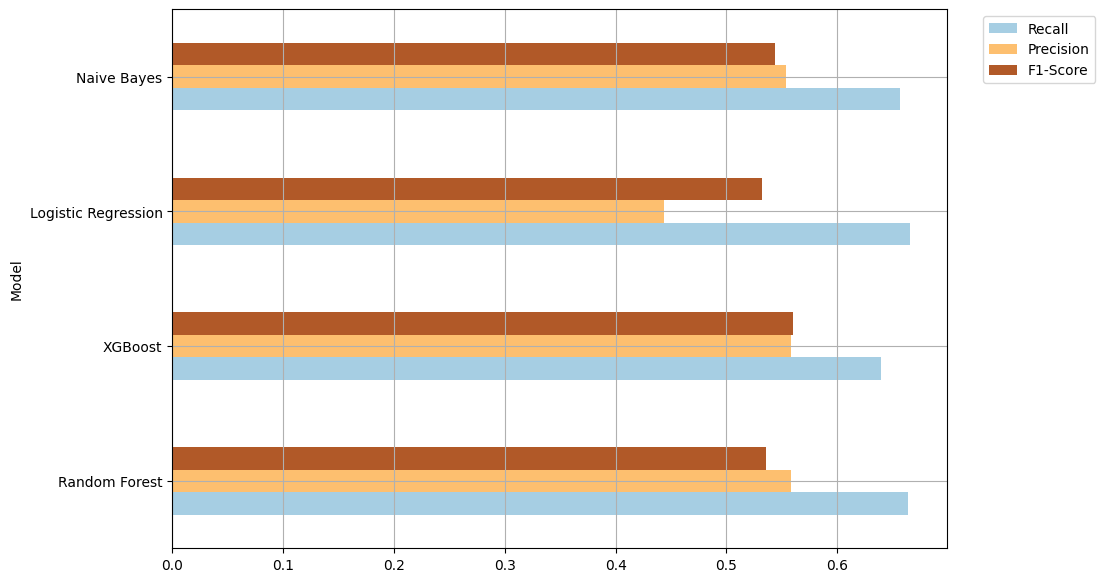

In [17]:
results_df.plot(kind="barh", figsize=(10, 7), grid=True, colormap="Paired").legend(bbox_to_anchor=(1.2,1));

---
Inference  : todo

---